In [1]:
import pickle
import numpy as np
from bluepysnap import Circuit

In [3]:
with open('../output/rich_club/slice10_rc_weighted_totaldegree.pkl','rb') as f:
    p = pickle.load(f)

In [13]:
target = 'slice10'

In [16]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/sonata/circuit_config.json')
nodes = c.nodes['hippocampus_neurons']
target_indices = nodes.ids(target)

In [62]:
# Get indices of subgraphs and their mtypes
mydict = {}
my_mtypes = {}
for idx, (k, results) in enumerate(p.items()):
    rc_coeff = results['rc_coeff']
    subgraph_inds = results['subgraph_inds']
    if not isinstance(subgraph_inds,np.ndarray):
        continue
    subgraph_target_inds = target_indices[subgraph_inds]
    if idx>0:
        inds_on_prev_k = np.setdiff1d(prev_list,subgraph_target_inds)
        mydict[int(prev_k)] = inds_on_prev_k
        my_mtypes[int(prev_k)] = nodes.get(inds_on_prev_k).mtype.values
    prev_k = k
    prev_list = subgraph_target_inds

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
mtypes = np.unique(nodes.get().mtype)

In [98]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

class MorphologicalTypeDistribution:
    def __init__(self, my_mtypes):
        self.my_mtypes = my_mtypes
        self.fig, self.ax = plt.subplots()

    def update(self, k):
        self.ax.clear()
        unique_mtypes = len(set(self.my_mtypes[k]))
        if unique_mtypes > 0:
            self.ax.hist(self.my_mtypes[k], bins=unique_mtypes)
            self.ax.set_xlabel('Morphological Types')
            self.ax.set_ylabel('Frequency')
            self.ax.set_title(f'Morphological Type Distribution for k = {k}')
        else:
            self.ax.text(0.5, 0.5, 'No data to display', horizontalalignment='center', verticalalignment='center', transform=self.ax.transAxes)

    def animate_distribution(self):
        anim = FuncAnimation(self.fig, self.update, frames=sorted(self.my_mtypes.keys()), interval=500)
        return HTML(anim.to_jshtml())


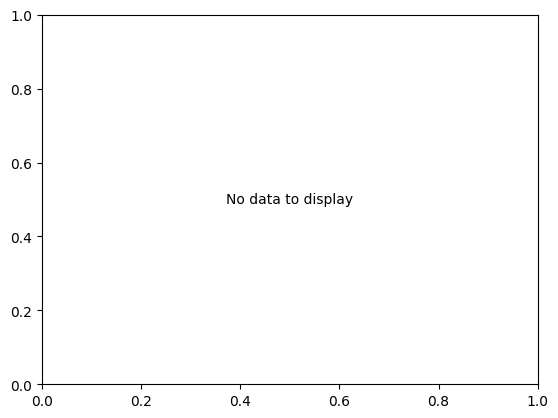

In [99]:
# Create an instance of the MorphologicalTypeDistribution class
morph_type_dist = MorphologicalTypeDistribution(my_mtypes)

# Call the animate_distribution method on the instance
morph_type_dist.animate_distribution()


In [100]:
# from matplotlib import pyplot as plt
# from celluloid import Camera

# fig = plt.figure()
# camera = Camera(fig)
# for i in range(10):
#     plt.plot([i] * 10)
#     camera.snap()
# animation = camera.animate()

# analyze k which are significant wrt weight shuffled random model

In [ ]:
# load norm rcc and get k with values > 1
